In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus
from sklearn import tree

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [2]:
columns = ["pregnant", "glucose", "bp", "skin", "insulin", "bmi", "pedigree", "age", "label"]

df= pd.read_csv("/content/drive/MyDrive/Collab DataSets/pima-indians-diabetes.csv", header= None, names= columns)
df.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.corr()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
pregnant,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedigree,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
label,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [4]:
features_col = ["pregnant", "insulin", "bmi", "age", "glucose", "bp", "pedigree"]

features = df[features_col]
labels = df[["label"]]

In [5]:
mms = MinMaxScaler()
features = mms.fit_transform(features)

In [6]:
x_train, x_test, y_train, y_test = train_test_split(features, labels)

In [7]:
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [8]:
y_pred = clf.predict(x_test)

In [9]:
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[96 34]
 [18 44]]
0.7291666666666666


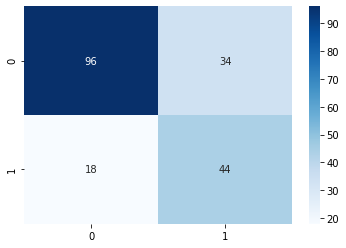

In [10]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, cmap= "Blues")

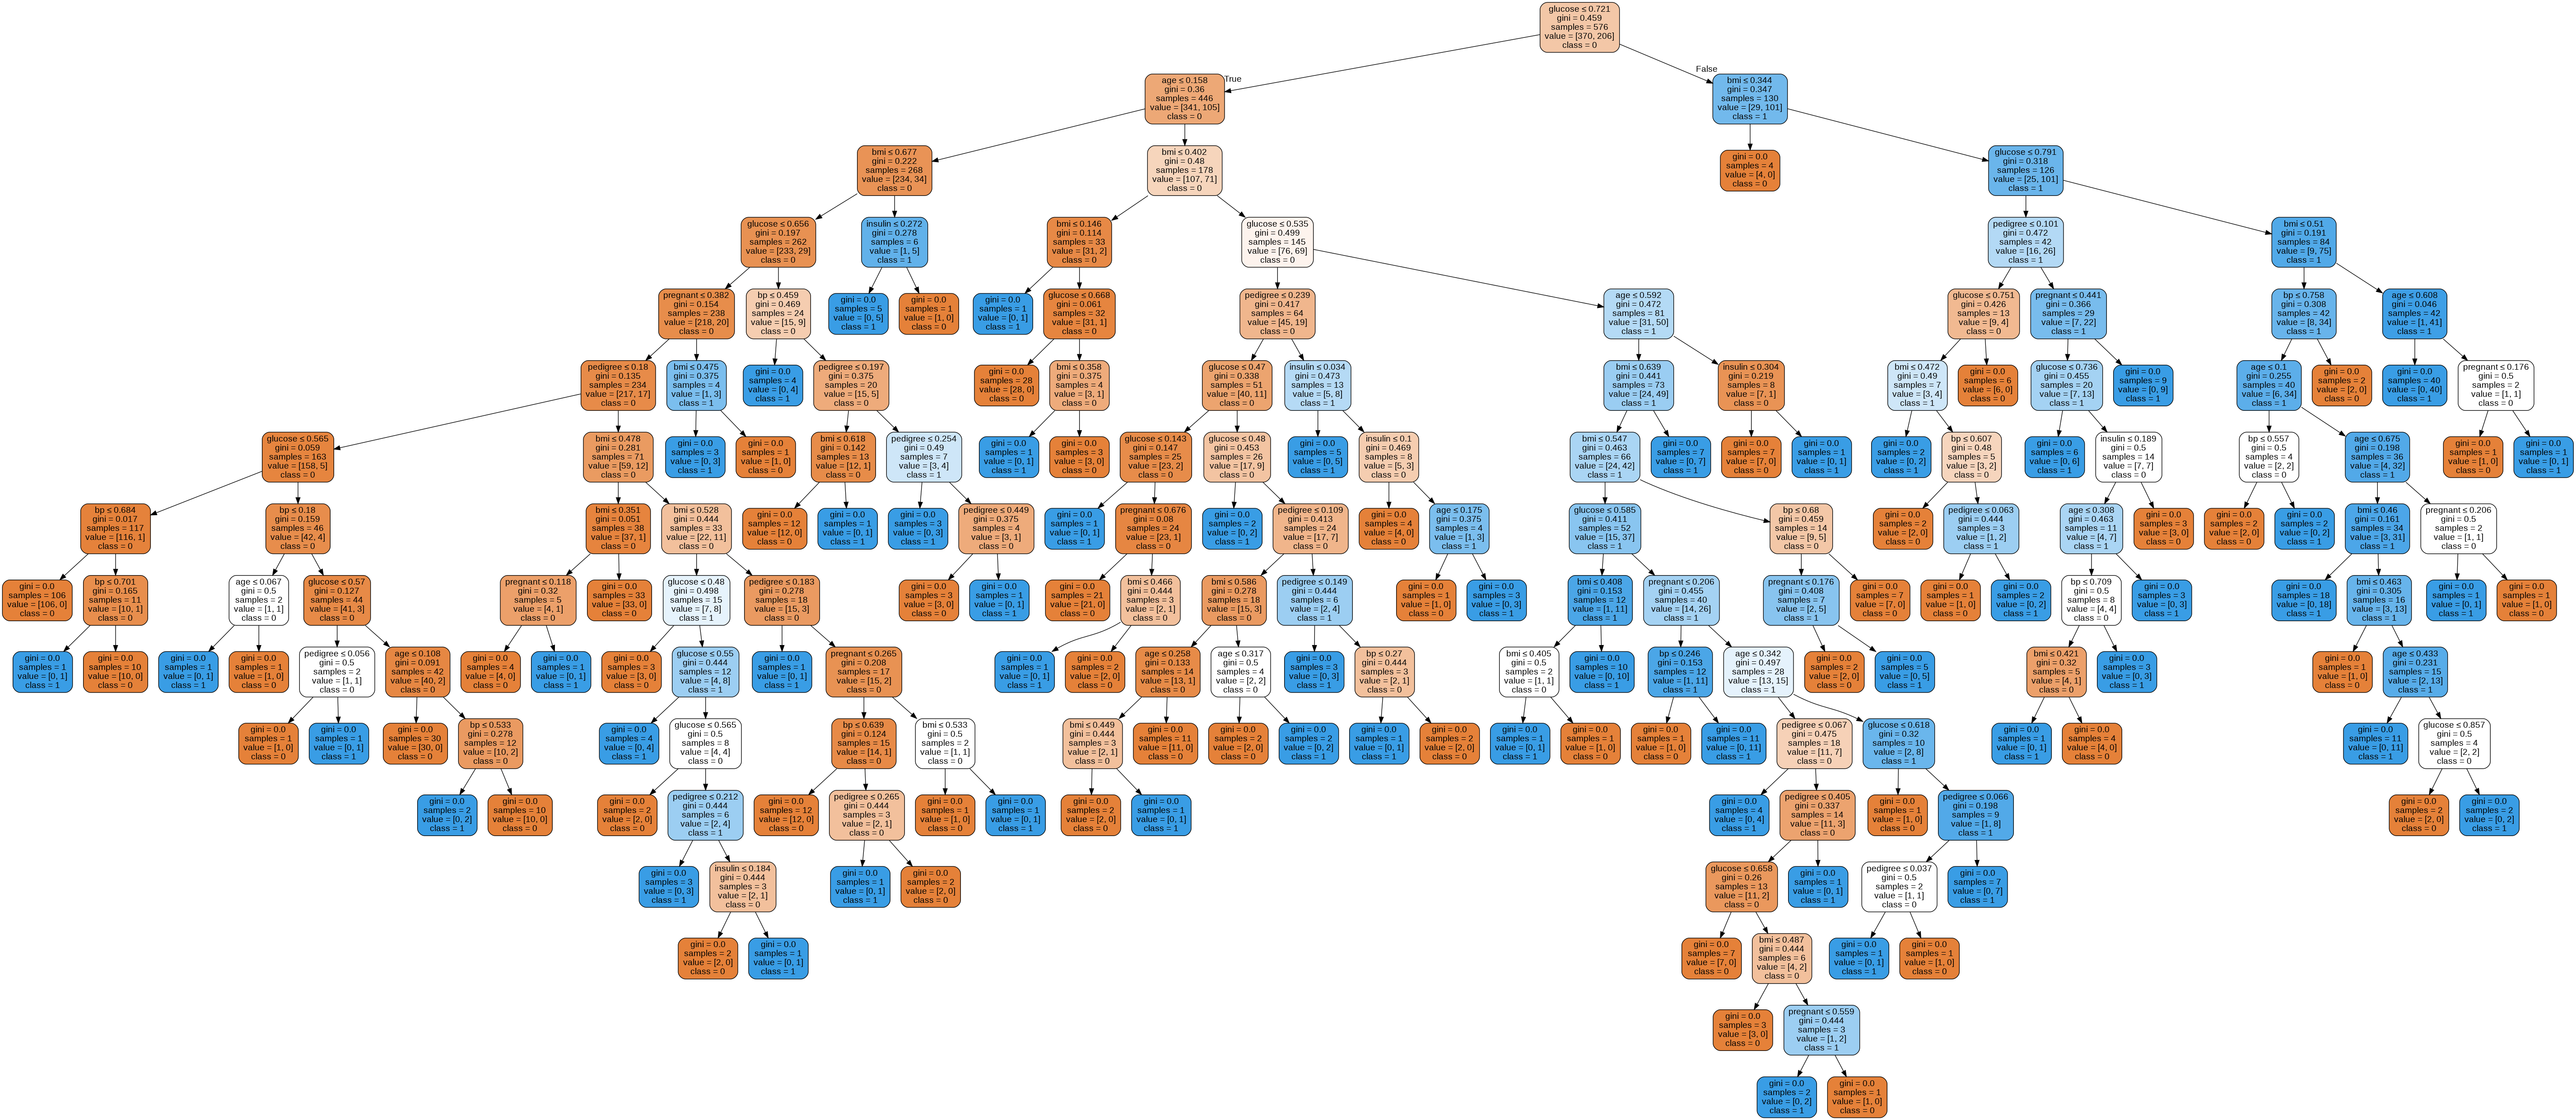

In [11]:
dot_data = StringIO()
export_graphviz(clf , out_file=dot_data, filled=True, rounded= True, special_characters=True, feature_names= features_col, class_names=["0", "1"])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png("diabetes.png")
Image(graph.create_png())

[Text(527.8066634241245, 526.6125000000001, 'X[4] <= 0.721\ngini = 0.459\nsamples = 576\nvalue = [370, 206]'),
 Text(325.0024319066148, 492.63750000000005, 'X[3] <= 0.158\ngini = 0.36\nsamples = 446\nvalue = [341, 105]'),
 Text(239.64688715953307, 458.6625, 'X[2] <= 0.677\ngini = 0.222\nsamples = 268\nvalue = [234, 34]'),
 Text(205.72178988326846, 424.6875, 'X[4] <= 0.656\ngini = 0.197\nsamples = 262\nvalue = [233, 29]'),
 Text(163.9260700389105, 390.7125, 'X[0] <= 0.382\ngini = 0.154\nsamples = 238\nvalue = [218, 20]'),
 Text(117.24513618677042, 356.7375, 'X[6] <= 0.18\ngini = 0.135\nsamples = 234\nvalue = [217, 17]'),
 Text(49.93774319066147, 322.76250000000005, 'X[4] <= 0.565\ngini = 0.059\nsamples = 163\nvalue = [158, 5]'),
 Text(17.36964980544747, 288.7875, 'X[5] <= 0.684\ngini = 0.017\nsamples = 117\nvalue = [116, 1]'),
 Text(8.684824902723735, 254.8125, 'gini = 0.0\nsamples = 106\nvalue = [106, 0]'),
 Text(26.054474708171206, 254.8125, 'X[5] <= 0.701\ngini = 0.165\nsamples = 11\

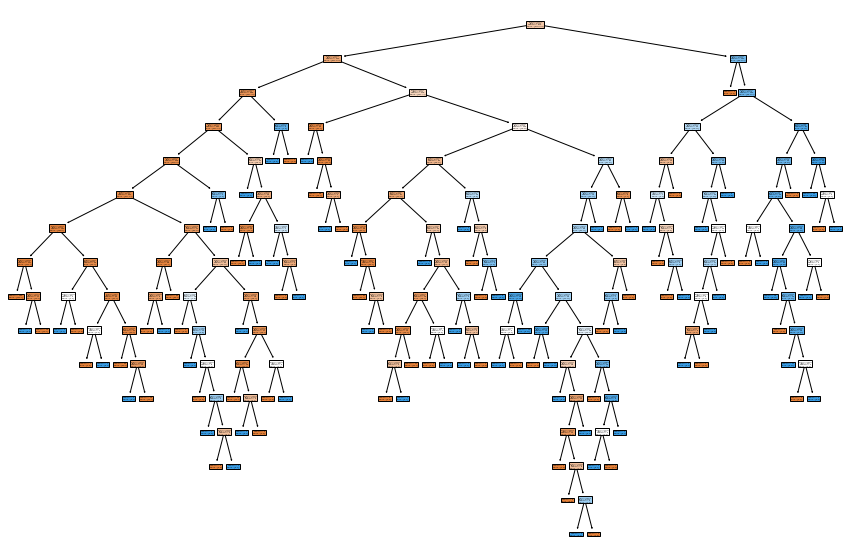

In [12]:
plt.figure(figsize=(15,10))
tree.plot_tree(clf, filled=True)
